In [36]:
# !pip install numpy scikit-learn seaborn matplotlib

## 1. Fitting polinomial predictors to data

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### First, generate the features from $U~(0,1)$

In [38]:
W = np.random.uniform(0, 1, 1000)
W.sort()
W = W.reshape(-1, 1)
print(W)


[[0.00153724]
 [0.00163377]
 [0.00222891]
 [0.00290419]
 [0.00306319]
 [0.00341952]
 [0.00391838]
 [0.00494968]
 [0.00587443]
 [0.00623517]
 [0.00660415]
 [0.00900393]
 [0.00965927]
 [0.01149455]
 [0.01172319]
 [0.01238886]
 [0.01257186]
 [0.01268653]
 [0.01291856]
 [0.01532588]
 [0.01547315]
 [0.01622849]
 [0.01661184]
 [0.01734112]
 [0.01864068]
 [0.01926228]
 [0.02061034]
 [0.02197195]
 [0.02273676]
 [0.02570752]
 [0.02920364]
 [0.0292592 ]
 [0.02996086]
 [0.03017554]
 [0.03074685]
 [0.03273538]
 [0.0330091 ]
 [0.03427281]
 [0.03798914]
 [0.03869459]
 [0.03870025]
 [0.04209088]
 [0.04234036]
 [0.04285388]
 [0.04301683]
 [0.04324241]
 [0.04461505]
 [0.04694275]
 [0.04851036]
 [0.04954145]
 [0.04977266]
 [0.04999399]
 [0.05001429]
 [0.05026951]
 [0.05126542]
 [0.0521955 ]
 [0.05272446]
 [0.05311949]
 [0.05757509]
 [0.05792743]
 [0.05795451]
 [0.05796881]
 [0.05812029]
 [0.05872805]
 [0.05912667]
 [0.06066714]
 [0.06078202]
 [0.06127456]
 [0.06217739]
 [0.06256564]
 [0.06384339]
 [0.06

In [39]:
e = np.random.normal(0,1,1000)
e = e.reshape(-1,1)
print(e)
e.shape

[[-4.16548162e-01]
 [-1.23043750e+00]
 [ 6.48455670e-02]
 [-2.13870199e+00]
 [ 2.02224128e+00]
 [-8.31250890e-01]
 [-1.16295594e+00]
 [ 3.42565733e-01]
 [-7.16286114e-01]
 [-2.86211482e+00]
 [-1.40693590e+00]
 [ 2.27375318e-01]
 [-4.87930487e-01]
 [-8.60893291e-01]
 [ 8.32103722e-01]
 [ 3.19061671e-02]
 [-9.98089454e-01]
 [ 7.44691556e-01]
 [ 1.60291142e-01]
 [ 1.01679816e+00]
 [-2.72822647e+00]
 [-6.44876566e-01]
 [-1.73349200e+00]
 [-1.37363719e+00]
 [ 9.72770148e-01]
 [-1.94037919e-01]
 [ 1.37679493e+00]
 [ 1.19134100e+00]
 [ 5.69153915e-02]
 [-9.46466456e-01]
 [ 1.18061569e-01]
 [ 6.48986628e-01]
 [ 2.76922528e-01]
 [ 1.84244461e+00]
 [-9.90207102e-02]
 [-1.56240251e+00]
 [ 6.38488717e-01]
 [ 1.56999174e+00]
 [ 1.02962077e+00]
 [-1.89587042e-02]
 [ 2.23769071e-01]
 [ 1.01128431e+00]
 [-1.14400337e+00]
 [-1.95362814e+00]
 [-1.41554641e+00]
 [ 3.10257252e-01]
 [ 5.17999755e-01]
 [-1.56245584e+00]
 [ 1.55829216e-01]
 [ 2.51054365e-02]
 [-5.18519738e-01]
 [-1.76460520e-01]
 [-4.4751681

(1000, 1)

### Now, the data generating process is described by the following equation

$
\begin{equation}
    Y = \exp{(4W)} + \varepsilon, \quad \varepsilon \sim N(0,1)
\end{equation}
$
#### So, we are sampling $N=1000$ pairs $(W_i,Y_i)_{i=1}^{N}$ from it.

In [40]:
y = np.exp(4 * W) + e

#### To perform OLS estimation using sklearn library, we must first initialize a LinearRegression type object. Then, we can call the method .fit("features","data") to calculate parameter estimates and .predict("features") to calculate the fitted equation

#### First, we are going to fit a first order polynomial to the data. Mathematically

$ \begin{equation}
m_1(W) = \beta_0 + \beta_1 W
\end{equation}
$

In [41]:
model = LinearRegression()
model.fit(W, y)
y_hat = model.predict(W)

#### The graph below shows how the predictor fits the data

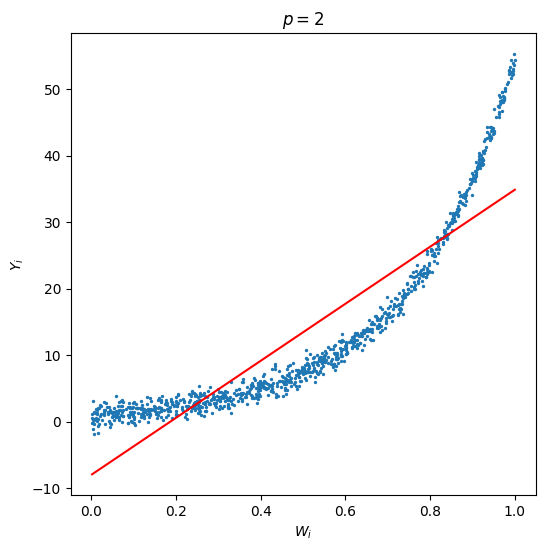

In [42]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W, y, s = 2)
ax.plot(W, y_hat, color = 'r', linestyle = "-")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=2$")
plt.show()

#### From mere visual inspection, it seems like a bad fit.

#### Now, What will happen if we add another degree to the polynomial:

$
\begin{equation}
m_2(W) = \beta_0+\beta_1W+\beta_2 W^2
\end{equation}
$

In [43]:
W_2 = np.hstack((W, W ** 2))
print(W_2)
W_2.shape

[[1.53723764e-03 2.36309955e-06]
 [1.63376852e-03 2.66919958e-06]
 [2.22891189e-03 4.96804821e-06]
 ...
 [9.97914049e-01 9.95832449e-01]
 [9.98240971e-01 9.96485035e-01]
 [9.99817833e-01 9.99635698e-01]]


(1000, 2)

### We fit and predict the model

In [44]:
model = LinearRegression()
model.fit(W_2, y)
y_hat = model.predict(W_2)

#### And generate a graph to see how good it performs

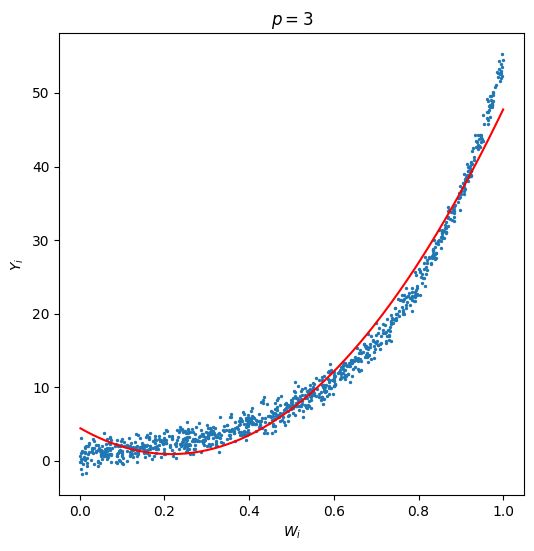

In [45]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W, y, s = 2)
ax.plot(W, y_hat, color = 'r', linestyle = "-")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=3$")
plt.show()

### And if we add a third degree? Let's see...

In [46]:
W_3 = np.hstack((W, W ** 2, W ** 3))

### Fitting the model

In [47]:
model = LinearRegression()
model.fit(W_3, y)
y_hat = model.predict(W_3)

### And graphing

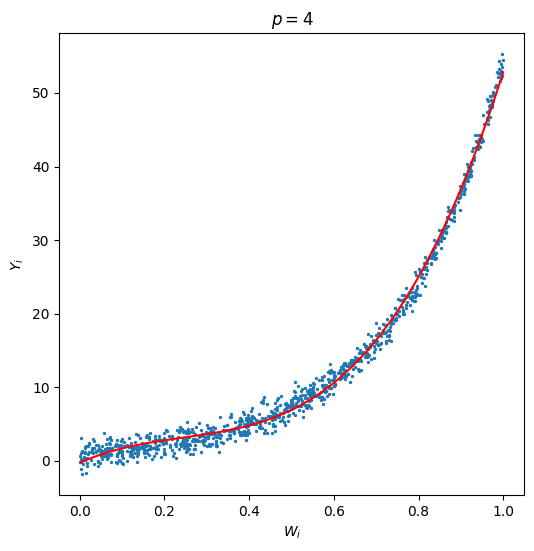

In [48]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W, y, s =2 )
ax.plot(W, y_hat, color = 'r', linestyle = "-")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=4$")
plt.show()

### If we kept adding degrees (features) to the predictor function, we will end up fitting the data almost perfectly. However, that is not as good as it sounds: we are actually overfitting. That is something we do not want to do when trying to predict data out of the sample. In the next 

## 2. Overfitting

#### In the previous section, we concluded that adding features caused overfitting. Now, we are going to simulate another data generating process so we can assess certain goodnes of fit measures to undestand this phenomena

#### Let's generate a matrix of 999 features for a sample of 1000 observartions and a vector of 1000 dependent variables.

In [49]:
X = np.random.normal(0, 1, (1000, 1000 - 1))
y = np.random.normal(0, 1, (1000, 1))
print(X.shape)
print(y.shape)

(1000, 999)
(1000, 1)


### And we fit the data

In [50]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### There are two important goodness of fit measures: the mean squared error "$MSE$" and the R-squared "$R^2$". They are defined as

$
\begin{equation}
MSE = \frac{1}{T}\sum_{i=1}^{N} (Y_i-\hat{Y}_i)^2
\end{equation}
$
$
\begin{equation}
R^2 = 1-\frac{\sum_{i=1}^{N} (Y_i-\hat{Y}_i)^2}{\sum_{i=1}^{N} (Y_i-\bar{Y})^2} = 1-\frac{MSE}{TSS}
\end{equation}
$

### The MSE of the fitted model with 999 features is

In [51]:
mse = np.mean((y - model.predict(X)) ** 2)
print(mse)

1.1782976683357926e-26


### The MSE is virtually zero. That means that the predictor equals the actual data, so the goodness of fit of the model to the sample is perfect.

### Now, we calculate the R-squared

In [52]:
R_sq = 1 - mse / np.mean((y-np.mean(y)) ** 2)
print(R_sq)

1.0


### The R-squared is a goodnes of fit bounded between 0 and 1. The colser to 1 it is, the better the fit of the model to the sample. In this case, again, we are fitting perfectly the model to the data.

### Let's fit the model again, but this time reducing the number of features by 500

In [53]:
X = np.random.normal(0, 1, (1000, 500 - 1))
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Now we calculate the MSE

In [54]:
mse = np.mean((y - model.predict(X)) ** 2)
print(mse)

0.46765641847300876


### And the R-squared

In [55]:
R_sq = 1 - mse / np.mean(y ** 2)
print(R_sq)

0.5133440903512121


### Now, the R-squared has reduced to nearly 0.5. In fact, the R-squared performance is almost equal to the ratio $\frac{p}{n}$, where $p$ is the number of features and $n$ the number of observations. This means that the investigator has a way to manipulate the value of this measure by adding  features at convenience. 

### To sort this problem out, there exist an R-squared that penalizes the inclusion of irrelevant features. This is called the adjusted R-squared and is defined as

$
\begin{equation}
R_{adj}^{2} = 1-\frac{n}{n-p} \frac{MSE}{TSS}
\end{equation}
$

In [56]:
adj_mse = 1000/500*mse
adjR_sq = 1 - adj_mse / np.mean((y-np.mean(y))** 2)
print(adjR_sq)

0.026143851376528304


### Unlike the normal R-square, the adjusted version can be negative, which means really poor performance of the model.

### Finally, lets try to reduce the features by 950

In [57]:
X = np.random.normal(0, 1, (1000, 50 - 1))
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Calculate the MSE

In [58]:
mse = np.mean((y - model.predict(X)) ** 2)
print(mse)

0.9037656114295263


### The R-squared

In [59]:
R_sq = 1 - mse / np.mean((y-np.mean(y))** 2)
print(R_sq)

0.058991106677290794


### And the adjusted R-squared

In [60]:
adj_mse = 1000 / 950 * mse
adjR_sq = 1 - adj_mse / np.mean((y) ** 2)
print(adjR_sq)

0.01001797503695867


## 3. Data splitting

### As we have seen so far, overfitting is an issue because we lose predictive accuracy. This is going to be evident in this section by using a technique to measure predictive ability of a model: data splitting. Data splitting consists in dividing the overall sample in two sets: a training sample set and a test sample set. The training sample set is used to "teach" the model about the features (a.k.a estimate the parameters), and the test sample set is used to measure the predictive ability of the model (out of sample performance)

### We will use de data generated in the first exercise

In [61]:
# Features

W = np.random.uniform(0, 1, 1000)
W.sort()
W = W.reshape(-1, 1)

# Noise

e = np.random.normal(0,1,1000)
e = e.reshape(-1,1)

# Dependent variable

y = np.exp(4*W)+e

### Now, we are going to use three different predictors to assess out of sample predictive ability: linear, polynomial and sinusoidal

$
\begin{equation}
m_1(W) = \beta_0 + \beta_1 W
\end{equation}
$
$
\begin{equation}
m_2(W) = \beta_0 + \beta_1 W + \beta_2 W^2 + \beta_3 W^3
\end{equation}
$
$
\begin{equation}
m_3(W) = \beta_0 + \beta_1 \sin(W)
\end{equation}
$

### For each model, we create a matrix of regressors

In [62]:
W_1 = W
W_2 = np.hstack((W,W**2,W**3))
W_3 = np.sin(W)

### And now we construct the sets of test and trainig using sklearn library. To do that we need to import a module called "model_selection"

In [63]:
from sklearn.model_selection import train_test_split

### Now we can do the splitting. By default, the function train_test_split() splits the sample into 75% for training and 25% for testing, although it can be modified.

In [64]:
W_1_train,W_1_test,y_1_train,y_1_test = train_test_split(W_1,y)
W_2_train,W_2_test,y_2_train,y_2_test = train_test_split(W_2,y)
W_3_train,W_3_test,y_3_train,y_3_test = train_test_split(W_3,y)

### Now, we train the models by fitting them to the data

In [65]:
model_1 = LinearRegression()
model_1.fit(W_1_train,y_1_train)


LinearRegression()

In [66]:
model_2 = LinearRegression()
model_2.fit(W_2_train,y_2_train)


LinearRegression()

In [67]:
model_3 = LinearRegression()
model_3.fit(W_3_train,y_3_train)

LinearRegression()

### How do we use the test sample? First, predict the model fitted to the training sample using the test sample

In [68]:
y_1_hat_test = model_1.predict(W_1_test)
y_2_hat_test = model_2.predict(W_2_test)
y_3_hat_test = model_3.predict(W_3_test)


### Now, we can calculate our goodness of fit measures using all the test sample information

In [69]:
# MSE

mse_1_test = np.mean((y_1_test - y_1_hat_test) ** 2)
mse_2_test = np.mean((y_2_test - y_2_hat_test) ** 2)
mse_3_test = np.mean((y_3_test - y_3_hat_test) ** 2)

print(f'MSE out of sample of predictor 1 is {mse_1_test}')
print(f'MSE out of sample of predictor 2 is {mse_2_test}')
print(f'MSE out of sample of predictor 3 is {mse_3_test}')

# R-squared

R_sq_1_test = 1 - mse_1_test / np.mean((y_1_test-np.mean(y_1_test))** 2)
R_sq_2_test = 1 - mse_2_test / np.mean((y_2_test-np.mean(y_2_test))** 2)
R_sq_3_test = 1 - mse_3_test / np.mean((y_3_test-np.mean(y_3_test))** 2)

print(f'R-squared out of sample of predictor 1 is {R_sq_1_test}')
print(f'R-squared out of sample of predictor 2 is {R_sq_2_test}')
print(f'R-squared out of sample of predictor 3 is {R_sq_3_test}')

# Adjusted R-squared
adj_mse_1_test = 250 / (250-2) * mse_1_test
adjR_sq_1_test = 1 - adj_mse_1_test / np.mean((y_1_test-np.mean(y_1_test))** 2)

adj_mse_2_test = 250 / (250-3) * mse_2_test
adjR_sq_2_test = 1 - adj_mse_2_test / np.mean((y_2_test-np.mean(y_2_test))** 2)

adj_mse_3_test = 250 / (250-2) * mse_3_test
adjR_sq_3_test = 1 - adj_mse_3_test / np.mean((y_3_test-np.mean(y_3_test))** 2)

print(f'Adjusted R-squared out of sample of predictor 1 is {adjR_sq_1_test}')
print(f'Adjusted R-squared out of sample of predictor 2 is {adjR_sq_2_test}')
print(f'Adjusted R-squared out of sample of predictor 3 is {adjR_sq_3_test}')


MSE out of sample of predictor 1 is 41.39320216776995
MSE out of sample of predictor 2 is 1.244915029207295
MSE out of sample of predictor 3 is 53.918822412325525
R-squared out of sample of predictor 1 is 0.8102223990639097
R-squared out of sample of predictor 2 is 0.9944421496028512
R-squared out of sample of predictor 3 is 0.7547034325004918
Adjusted R-squared out of sample of predictor 1 is 0.8086919345402315
Adjusted R-squared out of sample of predictor 2 is 0.9943746453470154
Adjusted R-squared out of sample of predictor 3 is 0.7527252343754958
